In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.utils import load_h5_dict

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../../plotting/matplotlibrc")

In [18]:
d0 = load_h5_dict('../../data/pwave/archive/ann_rates_zm.h5')
d1 = load_h5_dict('../../data/pwave/pwave_partial_ann_rate_zm.h5')

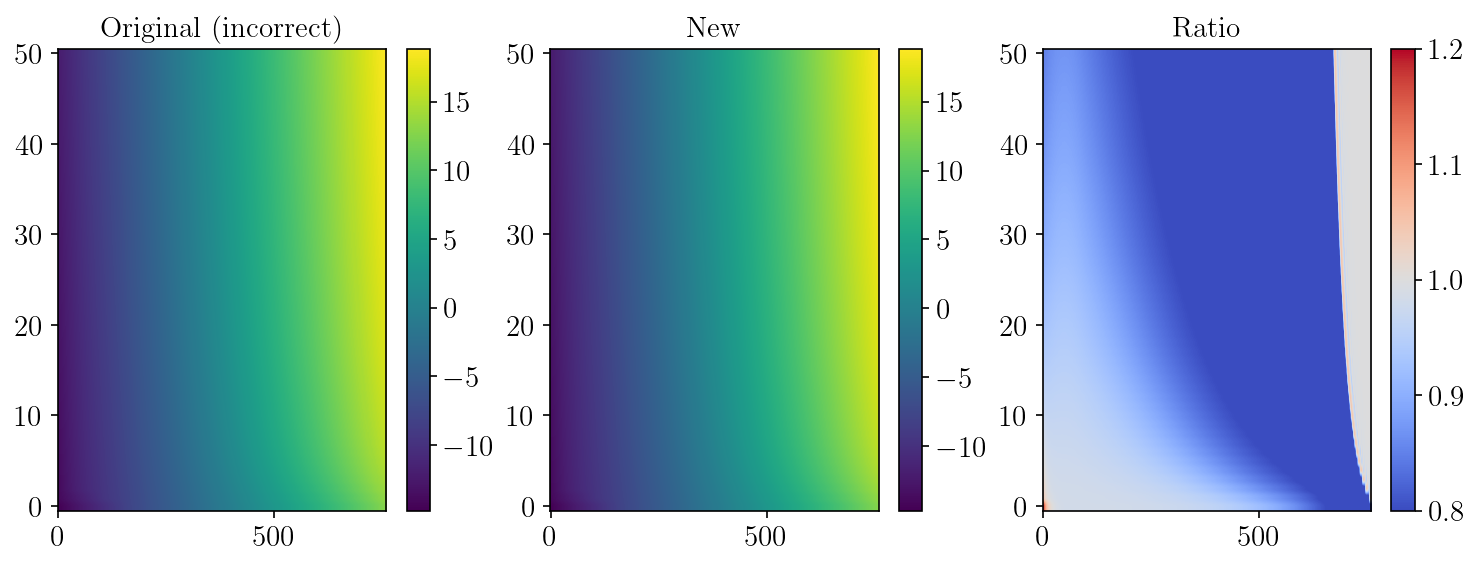

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

ax = axs[0]
im = ax.imshow(np.log10(d0['ann_rates']), origin='lower', aspect='auto')
ax.set_title('Original (incorrect)')
fig.colorbar(im, ax=ax)

ax = axs[1]
im = ax.imshow(np.log10(d1['ann_rate']), origin='lower', aspect='auto')
ax.set_title('New')
fig.colorbar(im, ax=ax)

ax = axs[2]
im = ax.imshow(d1['ann_rate'] / d0['ann_rates'], origin='lower', aspect='auto', cmap='coolwarm', vmin=0.8, vmax=1.2)
ax.set_title('Ratio')
fig.colorbar(im, ax=ax)

In [64]:
d0 = load_h5_dict('../../data/pwave/archive/pwave_ann_rate_sphere.h5')
d1 = load_h5_dict('../../data/pwave/pwave_partial_ann_rate_sphere.h5')

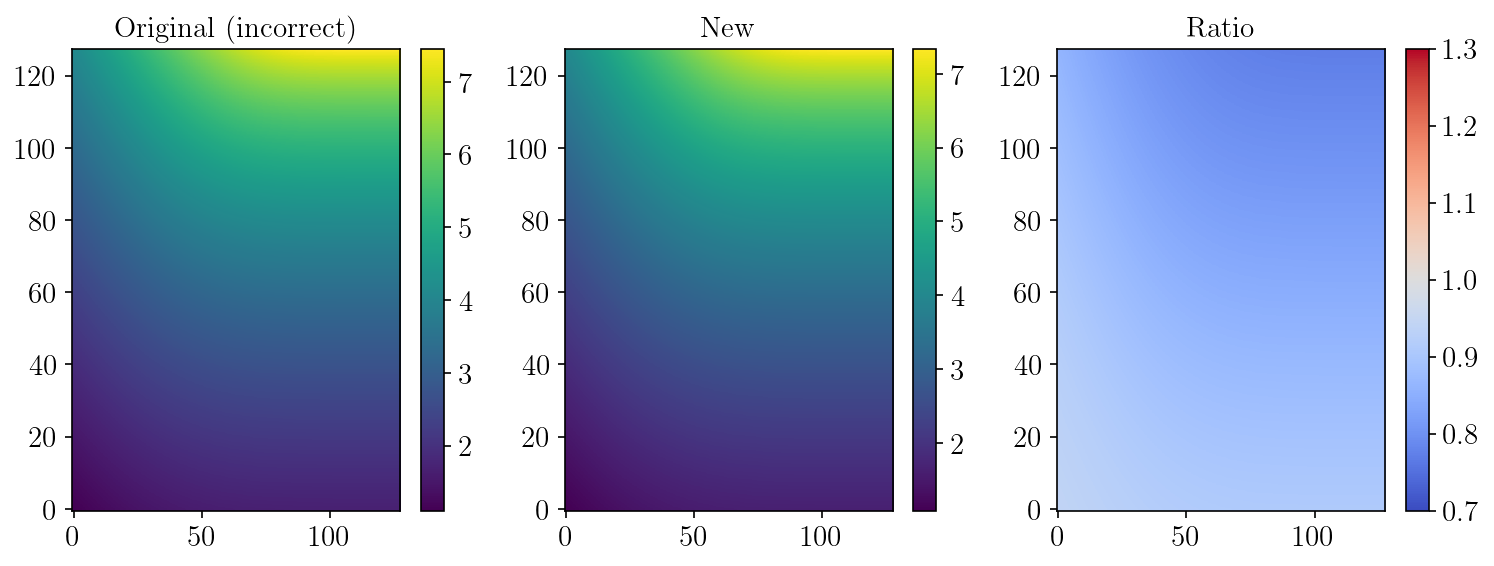

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

z0 = d0['ps_cond_ann_rate_table'][10]
z1 = d1['ps_cond_ann_rate'][10]

ax = axs[0]
im = ax.imshow(np.log10(z0), origin='lower', aspect='auto')
ax.set_title('Original (incorrect)')
fig.colorbar(im, ax=ax)

ax = axs[1]
im = ax.imshow(np.log10(z1), origin='lower', aspect='auto')
ax.set_title('New')
fig.colorbar(im, ax=ax)

ax = axs[2]
im = ax.imshow(z1 / z0, origin='lower', aspect='auto', cmap='coolwarm', vmin=0.7, vmax=1.3)
ax.set_title('Ratio')
fig.colorbar(im, ax=ax)

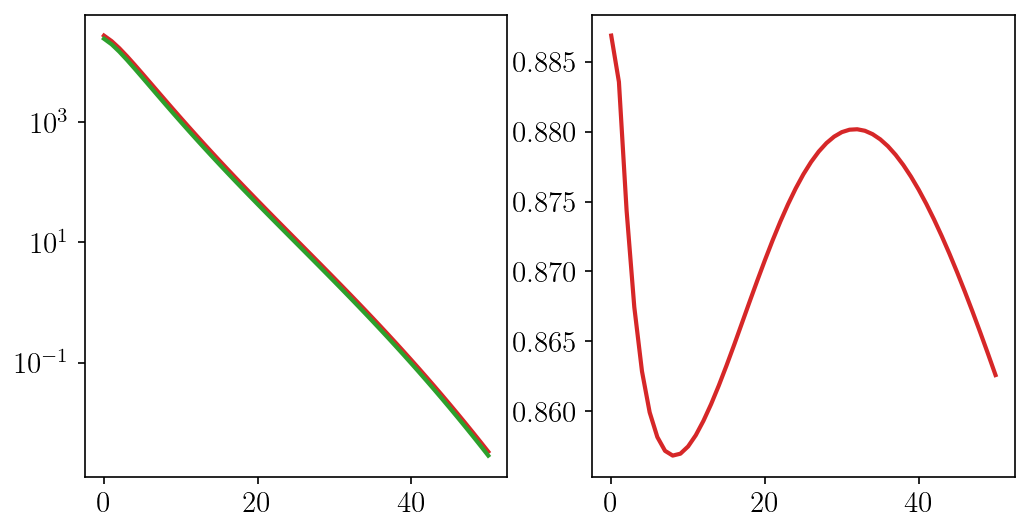

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ax = axs[0]
ax.plot(d0['ps_ann_rate_table'])
ax.plot(d1['ps_ann_rate'])
ax.set(yscale='log')

ax = axs[1]
ax.plot(d1['ps_ann_rate'] / d0['ps_ann_rate_table'])

# TMP

In [13]:
sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.injections.dm import DMPWaveAnnihilationInjection
import jax.numpy as jnp
from dm21cm.interpolators import interp2d, interp2d_vmap

In [15]:
inj = DMPWaveAnnihilationInjection(primary='elec_delta', m_DM=1e6, c_sigma=1, cell_size=2)